<h1>Introduzione<h1/>

Il Dataset Global Youtube Statistics 2023 include informazioni (numero visualizzazioni, iscritti, video caricati, ricavi annuali ecc.) sui principali canali youtube dal 2005 al 2022. 
Lo scopo di quest'analisi è ricavare le statistiche principali dei canali youtube (video caricati complessivi, paesi coinvolti, ecc.), le classifiche delle categorie di maggior successo e correlazioni tra metriche differenti, quantitative e geo-spaziali.
Le metriche principali utilizzate sono il numero di visualizzazioni, il numero di iscritti e il guadagno annuale.

<h1>Caricamento librerie e apertura df</h1>

In [3]:
import pandas as pd
import numpy as np

In [236]:
#Apertura da Google Colab
"""from google.colab import files
drive.mount('/content/drive')

# Definisci il percorso del file
file_path = '/content/drive/My Drive/Final Project Boolean/df_gyt.csv'

# Salva il dataframe in un file CSV
df.to_csv(file_path, index=False)"""

"from google.colab import files\ndrive.mount('/content/drive')\n\n# Definisci il percorso del file\nfile_path = '/content/drive/My Drive/Final Project Boolean/df_gyt.csv'\n\n# Salva il dataframe in un file CSV\ndf.to_csv(file_path, index=False)"

In [4]:
#Apertura in locale
try:
    df = pd.read_csv(r'C:\Users\Utente\Desktop\Data Analysis\Boolean\xx. Capstone Project\df_gys.csv', encoding='ISO-8859-1')
    load_success = True
except Exception as e:
    load_success = False
    error_message = str(e)

# Check whether the dataset was loaded
if load_success:
    print("Il Datafame df è stato caricato correttamente")
else:
    print(error_message)

Il Datafame df è stato caricato correttamente


In [238]:
# Creiamo copia dataframe da utilizzare in caso di necessità
df_copy = df

pd.set_option('display.max_columns', None)  # Mostra tutte le colonne

#Apriamo il df per una prima esplorazione
df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross_tertiary_education_enrollment,Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


<h1>Data Cleaning</h1>

Analisi generale dei campi, dei duplicati e dei NaN 

In [239]:
#Standardizziamo i nomi dei campi usando solo lettere maiuscole con underscore se è fatto da più parole per maggior leggibilità
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   rank                                 995 non-null    int64  
 1   youtuber                             995 non-null    object 
 2   subscribers                          995 non-null    int64  
 3   video_views                          995 non-null    float64
 4   category                             949 non-null    object 
 5   title                                995 non-null    object 
 6   uploads                              995 non-null    int64  
 7   country                              873 non-null    object 
 8   abbreviation                         873 non-null    object 
 9   channel_type                         965 non-null    object 
 10  video_views_rank                     994 non-null    float64
 11  country_rank                    

In [241]:
df.describe()

,rank,subscribers,video_views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population,latitude,longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,9.950000e+02,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,4.422574e+05,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,8.612161e+05,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,3.265000e+04,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,1.595000e+05,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,4.551000e+05,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [242]:
# Calcola numero e percentuale di NaN per colonna per decidere dove e quale pulizia effettuare
nan_count = df.isna().sum()
nan_percent = (nan_count / len(df)) * 100

# Crea la tabella riepilogativa
nan_summary = pd.DataFrame({
    'Valori NaN': nan_count.values,
    'Percentuale NaN': nan_percent.round(2).astype(str) + '%'
})

# Visualizza la tabella
nan_summary

,Valori NaN,Percentuale NaN
rank,0,0.0%
youtuber,0,0.0%
subscribers,0,0.0%
video_views,0,0.0%
category,46,4.62%
title,0,0.0%
uploads,0,0.0%
country,122,12.26%
abbreviation,122,12.26%
channel_type,30,3.02%


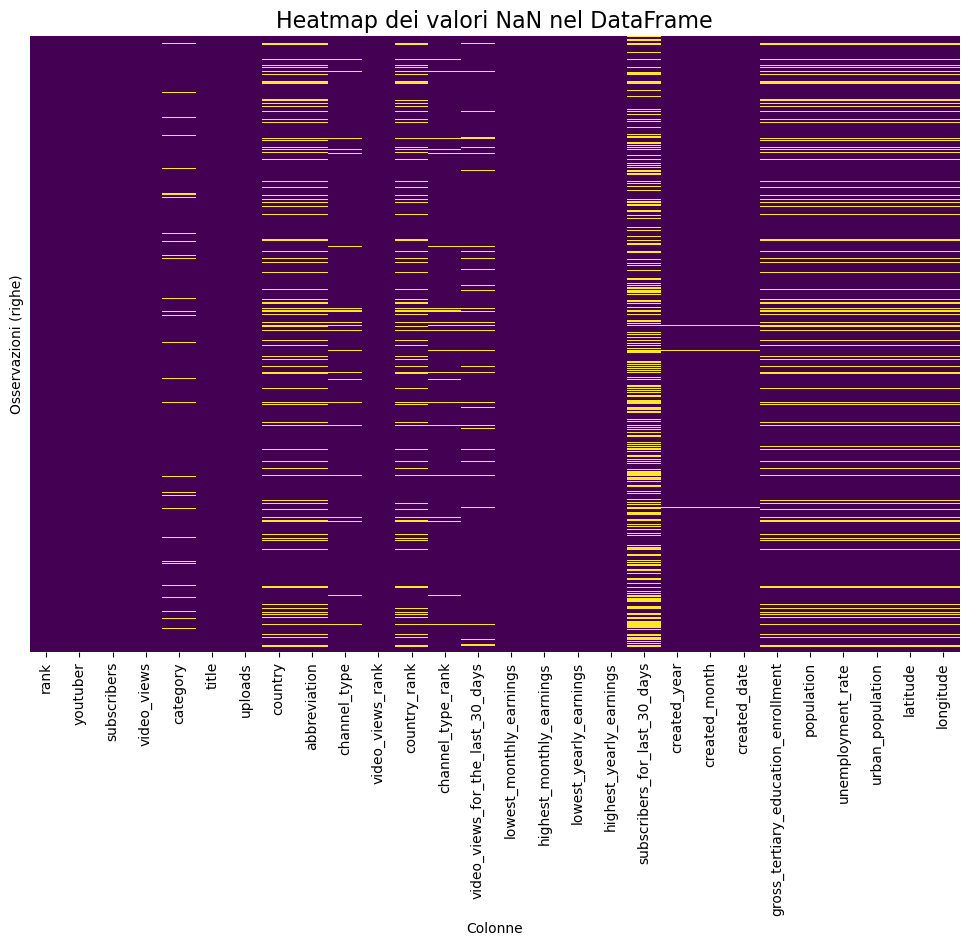

In [243]:
#Creo una Heatmap per la visualizzazione dei NaN

import matplotlib.pyplot as plt
import seaborn as sns

# Imposta dimensioni della figura
plt.figure(figsize=(12, 8))

# Crea la heatmap dei NaN
sns.heatmap(df.isnull(), 
            cbar=False, 
            cmap="viridis", 
            yticklabels=False)

plt.title("Heatmap dei valori NaN nel DataFrame", fontsize=16)
plt.xlabel("Colonne")
plt.ylabel("Osservazioni (righe)")
plt.show()


In [244]:
# Cerchiamo le righe duplicate nel DataFrame per evitare ridondanza dei dati e avere un dataset più compatto
# Conta le righe duplicate
num_duplicati = df.duplicated().sum()

# Mostra il risultato
print(f"Numero di righe duplicate: {num_duplicati}")


Numero di righe duplicate: 0


Campi equivalenti

In [245]:
# Confrontiamo i valori di 'youtuber' e 'title', ignorando le maiuscole/minuscole.
differences = df[df['youtuber'].str.lower() != df['title'].str.lower()]

# Modifichiamo il numero massimo di righe da visualizzare
pd.set_option('display.max_rows', None)

differences[['youtuber', 'title']].head(5)

,youtuber,title
1,YouTube Movies,youtubemovies
8,Like Nastya,Like Nastya Vlog
16,5-Minute Crafts,5-Minute Crafts 2.0
27,T-Series Bhakti Sagar,T- SERIES BHAKTI SAGAR
38,LooLoo Kids - Nursery Rhymes and Children's Songs,LooLoo Kids - Nursery Rhymes and Children's ï¿½


In [246]:
#Droppiamo il campo youtuber perché sovrapponibile a title, che non ha campi nulli - stiamo considerando i canali, non come si chiamano gli youtuber.
#In questo modo il df sarà più compatto.
df.drop('youtuber', axis=1, inplace=True)


In [247]:
df.head(20)

,rank,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population,latitude,longitude
0,1,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.000000e+00,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5.0,3.0,3.0,7.316740e+08,182900.0,2900000.00,2200000.00,3.510000e+07,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,44.0,1.0,4.0,3.918400e+07,9800.0,156700.00,117600.00,1.900000e+06,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,630.0,5.0,25.0,4.894700e+07,12200.0,195800.00,146800.00,2.300000e+06,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,8.0,5.0,6.0,5.805740e+08,145100.0,2300000.00,1700000.00,2.790000e+07,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


Sostituzione dei caratteri speciali con alfabeto latino

In [248]:
#Molti canali hanno caratteri scritti con altri alfabeti e simboli speciali, che interferiscono con la visualizzazione
# Applichiamo un algoritmo di ricerca dei caratteri speciali
import re

# Regex per rilevare simboli problematici, incluso ï, ý, e caratteri non alfanumerici
special_char_pattern = re.compile(r"([¿½ïý])")

# Funzione per cercare caratteri speciali
def find_special_characters(df, columns):
    special_characters = {}
    for column in columns:
        special_characters[column] = []
        for i, value in enumerate(df[column]):
            if special_char_pattern.search(str(value)):
                special_characters[column].append((i, value))
    return special_characters

# Colonne da analizzare
columns_to_check = ["category", "title", "country"]

# Applicazione della funzione
results = find_special_characters(df, columns_to_check)

# Visualizzazione dei risultati
for column, issues in results.items():
    if issues:
        print(f"\nCaratteri speciali trovati nella colonna '{column}':\n")
        for index, value in issues:
            print(f"  Riga {index}, Valore: '{value}'")
    else:
        print(f"\nNessun carattere speciale trovato nella colonna '{column}'.\n")



Nessun carattere speciale trovato nella colonna 'category'.


Caratteri speciali trovati nella colonna 'title':

  Riga 6, Valore: 'ýýý Kids Diana Show'
  Riga 38, Valore: 'LooLoo Kids - Nursery Rhymes and Children's ï¿½'
  Riga 43, Valore: 'BillionSurpriseToys  - Nursery Rhymes & Cartï¿½'
  Riga 55, Valore: 'Vocï¿½ï¿½ï¿½'
  Riga 64, Valore: 'ýýýýýýýý ýý ýýýýýýýýýýýýýý'
  Riga 76, Valore: 'shfa2 - ï¿½ï¿½'
  Riga 85, Valore: 'ýýýýýýýýýý ýýýýýý'
  Riga 91, Valore: 'Vlad vï¿½ï¿½ï'
  Riga 93, Valore: 'ýýýýýýýýýýýý one31'
  Riga 105, Valore: 'La Granja de Zenï¿½'
  Riga 112, Valore: 'Genevieve's Playhouse - Learning Videos for ï¿½'
  Riga 132, Valore: 'BETER Bï¿½ï¿½'
  Riga 145, Valore: 'DONA ï¿½ï¿½'
  Riga 161, Valore: 'ýýýýýýýýýýýýýýý ýýýýýý ýýýýýýýýýýýýýýýýýý'
  Riga 162, Valore: 'Boram Tube Vlog [ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿'
  Riga 165, Valore: 'ýýýýýýýý ýýýýýýýý ýýýýýýýýýý | toyoraljanahtv'
  Riga 196, Valore: 'ýýý Kids Roma Show'
  Riga 200, Valore: 'ToyPudding TV[ï¿½ï¿½ï¿½ï¿½ï'
  Rig

In [249]:
#Prima di correggere i nomi dei canalai facciamo un conteggio delle righe con caratteri speciali
column_counts = {"youtuber": 0, "category": 0, "title": 0, "country": 0}

# Controlla per ogni riga e colonna
for column, issues in results.items():
    if column in column_counts:  # Controlla solo le colonne di interesse
        column_counts[column] += len(issues)

# Stampa il conteggio per ogni colonna
for column, count in column_counts.items():
    print(f"Colonna '{column}': {count} righe con caratteri speciali")


Colonna 'youtuber': 0 righe con caratteri speciali
Colonna 'category': 0 righe con caratteri speciali
Colonna 'title': 104 righe con caratteri speciali
Colonna 'country': 0 righe con caratteri speciali


In [250]:
# Dizionario con le nuove assegnazioni ricerca youtube ottenute con chat gpt
reassignments = {
    6: "Kids Diana Show",
    38: "LooLoo Kids - Nursery Rhymes and Children's Songs",
    43: "BillionSurpriseToys - Nursery Rhymes & Cartoons",
    55: "Voice TV",
    64: "Channel 7HD",
    76: "shfa2",
    85: "Toyor Al Janah",
    91: "Vlad and Niki",
    93: "one31",
    105: "La Granja de Zenon",
    112: "Genevieve's Playhouse - Learning Videos for Kids",
    132: "BET Networks",
    145: "DONA",
    161: "Majid Kids Channel",
    162: "Boram Tube Vlog",
    165: "Toyor Al Janah TV",
    196: "Kids Roma Show",
    200: "ToyPudding TV",
    215: "Junya",
    219: "Beyonce",
    250: "1theK",
    254: "MrBeast en Espanol",
    259: "netd muzik",
    280: "Peppa Pig Espanol",
    301: "BabyBus - Canciones Infantiles & Videos para Ninos",
    320: "Sagawa",
    363: "Kurzgesagt - In a Nutshell",
    375: "Totoy Kids - Portugues",
    382: "Genevieve's Playhouse",
    433: "Channel 3",
    436: "Turma da Monica",
    441: "Little Angel Espanol",
    447: "Unknown",
    454: "Arab Games",
    462: "RsiamMusic",
    470: "Unknown",
    480: "Sebastian",
    495: "KIMPRO",
    496: "Jane ASMR",
    502: "24 Unknown",
    507: "Liziqi",
    516: "AMARINTV",
    517: "Al-Remas",
    547: "Gato Galactico",
    550: "With Kids",
    561: "Unknown",
    571: "GMMTV OFFICIAL",
    589: "Aday C",
    605: "Totoy Kids - Espanol",
    624: "Kuplinov",
    628: "Blippi Espanol",
    632: "Unknown",
    637: "Unknown",
    651: "Pokemon",
    657: "Oyuncak Av",
    668: "Hongyu ASMR",
    669: "Mohamed Ramadan",
    672: "Ruben",
    678: "Little Angel",
    690: "ISSEI",
    691: "Zeta",
    697: "iTownGamePlay",
    698: "Thai Ch8",
    700: "Unknown",
    702: "BAYASHITV",
    707: "Unknown",
    714: "Unknown",
    728: "Planeta das Galaxias",
    739: "IDEIAS INCRIVEIS",
    743: "Boram Tube ToysReview",
    749: "Saad Lamjarred",
    752: "Unknown",
    753: "Gyan Gaming",
    756: "Unknown",
    778: "Dorukhan G",
    784: "Unknown",
    790: "F2Freestylers - Ultimate Soccer Skills",
    795: "Unknown",
    796: "Luli Pampin",
    810: "Unknown",
    816: "Unknown",
    821: "O Que Nao Sei",
    828: "Wesley Safadao",
    851: "The World Adventures",
    854: "ATHLEAN-X",
    866: "Unknown",
    867: "Kids Line",
    874: "HUBA",
    875: "BIBO",
    883: "Twins From Russia",
    891: "Knowledge TV",
    893: "Peppa Pig em Portugues",
    894: "Ms Yeah",
    911: "Pastor Antonio",
    914: "BIBO",
    917: "AlArabiya",
    920: "Unknown",
    923: "Melon City Show",
    929: "Beyonce",
    945: "SULGI",
    954: "Little Baby Bum en Espanol",
    956: "Unknown",
    979: "DaniRep",
    990: "Natan por A"
}

# Riassegnare i valori nella colonna 'title' in base al dizionario
df.loc[reassignments.keys(), 'title'] = df.loc[reassignments.keys()].index.map(reassignments)

df.head(5)

,rank,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population,latitude,longitude
0,1,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


Analisi dei rapporti tra i diversi campi "rank"

Dall'analisi dei rapporti tra i diversi campi rank emerge che il campo video_views_rank dipende dal campo videoviews, il campo country_rank dipende dal campo population e il campo channel_type_rank dipende dal campo video_views ma forma n classifiche come i diversi channel_type

In [251]:
#Analisi dei rapporti tra i diversi campi rank
df_top20 = (
    df[['title', 'channel_type', 'country', 'population', 'subscribers', 'video_views',
        'video_views_rank', 'country_rank', 'channel_type_rank']]
    .sort_values(by='channel_type_rank', ascending=True)
    .head(20)
    .reset_index(drop=True)
)

df_top20


,title,channel_type,country,population,subscribers,video_views,video_views_rank,country_rank,channel_type_rank
0,T-Series,Music,India,1.366418e+09,245000000,2.280000e+11,1.0,1.0,1.0
1,Kimberly Loaiza,People,Mexico,1.260140e+08,41300000,5.603112e+09,1157.0,2.0,1.0
2,whinderssonnunes,Comedy,Brazil,2.125594e+08,44200000,4.274709e+09,1741.0,4.0,1.0
3,That Little Puff,Animals,United States,3.282395e+08,23700000,2.028969e+10,118.0,81.0,1.0
4,MR. INDIAN HACKER,Tech,India,1.366418e+09,31700000,5.711208e+09,1132.0,40.0,1.0
5,Supercar Blondie,Autos,United Arab Emirates,9.770529e+06,14100000,5.405563e+09,1202.0,7.0,1.0
6,TEDx Talks,Nonprofit,United States,3.282395e+08,38600000,7.339333e+09,768.0,25.0,1.0
7,Gaming,Games,NaN,NaN,93600000,0.000000e+00,4057944.0,NaN,1.0
8,WWE,Sports,United States,3.282395e+08,96000000,7.742847e+10,7.0,6.0,1.0
9,Aaj Tak,News,India,1.366418e+09,57600000,2.530775e+10,71.0,13.0,1.0


<h3>ANALISI DEI CAMPI<h3>

1) Category

I NaN possono essere riempiti usando i valori corrispondenti di un campo omogeneo, channel_type

In [252]:
#Esplorazione del df per verificare la corretta associazione tra nome del canale e categoria
print(df[['title', 'category']])

                                                 title               category
0                                             T-Series                  Music
1                                        youtubemovies       Film & Animation
2                                              MrBeast          Entertainment
3                           Cocomelon - Nursery Rhymes              Education
4                                            SET India                  Shows
5                                                Music                    NaN
6                                      Kids Diana Show         People & Blogs
7                                            PewDiePie                 Gaming
8                                     Like Nastya Vlog         People & Blogs
9                                        Vlad and Niki          Entertainment
10                                   Zee Music Company                  Music
11                                                 WWE          

In [253]:
# Analizziamo i NaN di Category - in totale sono 46 dal conteggio precedente
# Ordiniamo il df per vederli

# Filtra le righe dove category è NaN e mostra solo le colonne richieste
df[df['category'].isna()][['title', 'country','channel_type', 'category']]


,title,country,channel_type,category
5,Music,NaN,Music,NaN
12,Gaming,NaN,Games,NaN
18,sports,United States,Entertainment,NaN
91,Vlad and Niki,United States,Entertainment,NaN
102,News,NaN,NaN,NaN
132,BET Networks,Turkey,Games,NaN
155,Diana and Roma ESP,United States,Entertainment,NaN
161,Majid Kids Channel,United States,Entertainment,NaN
173,Popular on Youtube,NaN,Education,NaN
214,D Billions,United States,Entertainment,NaN


In [254]:
# Mostra tutte le colonne delle righe specificate
df.loc[[5, 12, 102, 173, 592]]

,rank,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population,latitude,longitude
5,6,119000000,0.0,NaN,Music,0,NaN,NaN,Music,4057944.0,NaN,NaN,NaN,0.0,0.0,0.0,0.00,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
12,13,93600000,0.0,NaN,Gaming,0,NaN,NaN,Games,4057944.0,NaN,1.0,NaN,0.0,0.0,0.0,0.00,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
102,103,36300000,0.0,NaN,News,0,NaN,NaN,NaN,4057944.0,NaN,NaN,NaN,0.0,0.0,0.0,0.00,NaN,2013.0,Sep,9.0,NaN,NaN,NaN,NaN,NaN,NaN
173,174,29300000,0.0,NaN,Popular on Youtube,3,NaN,NaN,Education,4019724.0,NaN,4847.0,1.0,0.0,0.0,0.0,0.05,NaN,2017.0,Aug,7.0,NaN,NaN,NaN,NaN,NaN,NaN
592,593,16100000,0.0,NaN,Live,0,NaN,NaN,NaN,4057944.0,NaN,NaN,NaN,0.0,0.0,0.0,0.00,NaN,2015.0,Jan,13.0,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
#Queste righe non rappresentano dei canali Youtube

df = df.drop(index=[5, 12, 102, 173, 592])


In [256]:
#Vediamo gli latri record con valori di video_views = 0
df[df['video_views'] == 0]

,rank,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population,latitude,longitude
1,2,170000000,0.0,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,12.0,0.0,0.05,0.04,0.58,NaN,2006.0,Mar,5.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
18,19,75000000,0.0,NaN,sports,3,United States,US,Entertainment,3898122.0,6266.0,5395.0,16.0,0.0,0.06,0.05,0.77,NaN,2006.0,Jan,30.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
360,361,20900000,0.0,NaN,Minecraft - Topic,0,NaN,NaN,Games,4057944.0,NaN,24.0,NaN,0.0,0.00,0.00,0.00,300000.0,2013.0,Dec,20.0,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
#Questi sembrano essere più aggregatori che canali, quindi li eliminamo.abs
df = df[df['video_views'] != 0]


In [258]:
#Riassegniamo la categoria corretta a due canali
df.loc[df['title'].isin(['harrystyles', 'BLACKPINK']), 'category'] = 'Music'


In [259]:
# Contiamo il numero di valori unici dei campi category e channel_type considerando che otterremo anche il risultato "nan" che dobbiamo escludere

unique_counts = df[['category', 'channel_type']].nunique()
print(unique_counts)

category        18
channel_type    14
dtype: int64


In [260]:
# Contiamo quante categorie ci sono nel df, ovvero cerchiamo i valori unici di category

df['category'].unique()

array(['Music', 'Entertainment', 'Education', 'Shows', 'People & Blogs',
       'Gaming', 'Sports', 'Film & Animation', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       nan, 'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [261]:
# Vediamo i valori unici di channel_type

df['channel_type'].unique()

array(['Music', 'Entertainment', 'Education', 'People', 'Sports', 'Film',
       'News', nan, 'Games', 'Comedy', 'Howto', 'Nonprofit', 'Autos',
       'Tech', 'Animals'], dtype=object)

In [262]:
# Seleziona solo le due colonne interessate, rimuovi duplicati
category_channel_map = df[['category', 'channel_type']].drop_duplicates()

# Ordina per channel_type per chiarezza
category_channel_map = category_channel_map.sort_values(by='channel_type')

# Mostra il risultato
print(category_channel_map)

                  category   channel_type
798         People & Blogs        Animals
275         Pets & Animals        Animals
109                 Gaming          Autos
702          Entertainment          Autos
786       Autos & Vehicles          Autos
104                 Gaming         Comedy
151         People & Blogs         Comedy
59                  Comedy         Comedy
294          Entertainment         Comedy
137                  Shows         Comedy
804       Film & Animation         Comedy
256                    NaN      Education
64        Film & Animation      Education
303         People & Blogs      Education
678          Entertainment      Education
924                  Music      Education
3                Education      Education
491                  Shows      Education
124                  Music  Entertainment
135       Film & Animation  Entertainment
333       Autos & Vehicles  Entertainment
286   Science & Technology  Entertainment
156                 Comedy  Entert

In [263]:
# Sostituiamo i NaN nella colonna 'category' con i valori della colonna 'channel_type' perchè sono due campi omogenei
df['category'] = df['category'].fillna(df['channel_type'])

# Resettiamo il limite al df
pd.reset_option('display.max_rows')

df.head(5)

,rank,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population,latitude,longitude
0,1,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.0,5500000.0,87500000.0,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,112000000,9.324704e+10,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,5.0,3.0,3.0,7.316740e+08,182900.0,2900000.0,2200000.0,35100000.0,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [264]:
# Contiamo il numero di NaN nella colonna 'category'
nan_count = df['category'].isna().sum()
nan_count

1

In [265]:
df[df['category'].isnull()]

,rank,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population,latitude,longitude
445,446,18800000,7.762077e+09,NaN,TG MAYANK YT,2,NaN,NaN,NaN,4057882.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,2021.0,Dec,21.0,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
#Si tratta di record anomali, senza video views e con pochissimi o zero upload. Possiamo eliminarli
df = df.dropna(subset=['category'])


In [267]:
df

,rank,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population,latitude,longitude
0,1,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.0,5500000.0,87500000.0,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,112000000,9.324704e+10,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,5.0,3.0,3.0,7.316740e+08,182900.0,2900000.0,2200000.0,35100000.0,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,12300000,9.029610e+09,Sports,Natan por A,1200,Brazil,BR,Entertainment,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.0,1700000.0,26500000.0,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.0,194200.0,3100000.0,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,12300000,2.214684e+09,Games,HybridPanda,2452,United Kingdom,GB,Games,129005.0,867.0,1202.0,6.703500e+04,17.0,268.0,201.0,3200.0,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,35112.0,4.0,69.0,3.871000e+06,968.0,15500.0,11600.0,185800.0,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


2) country

Questi NaN si possono riempire solo una ricerca su internet e su Youtube in quanto campi categorici, quindi la effetuiamo e proseguiamo al riempimento.

In [268]:
df[df['country'].isna()][['title', 'country']]


,title,country
14,goldmines,NaN
38,LooLoo Kids - Nursery Rhymes and Children's Songs,NaN
48,badabun,NaN
51,badbunny,NaN
57,brightside,NaN
...,...,...
958,Troom Troom PT,NaN
967,TROOM TROOM INDONESIA,NaN
972,Hero Movies 2023,NaN
985,TKoR,NaN


In [269]:
# Andiamo a vedere quali sono i valori unici di country nel dataframe
df['country'].unique()

array(['India', 'United States', 'Japan', 'Russia', 'South Korea', nan,
       'United Kingdom', 'Canada', 'Brazil', 'Argentina', 'Chile', 'Cuba',
       'El Salvador', 'Pakistan', 'Philippines', 'Thailand', 'Colombia',
       'Barbados', 'Mexico', 'United Arab Emirates', 'Spain',
       'Saudi Arabia', 'Indonesia', 'Turkey', 'Venezuela', 'Kuwait',
       'Jordan', 'Netherlands', 'Singapore', 'Australia', 'Italy',
       'Germany', 'France', 'Sweden', 'Afghanistan', 'Ukraine', 'Latvia',
       'Switzerland', 'Vietnam', 'Malaysia', 'China', 'Iraq', 'Egypt',
       'Andorra', 'Ecuador', 'Morocco', 'Peru', 'Bangladesh', 'Finland',
       'Samoa'], dtype=object)

In [270]:
# Usando chat gpt creiamo una lista degli indici di Paesi da riassegnare a ciascun Nan di country
indices_to_check = {
    'India': [178, 348, 288, 302, 264, 431, 14, 189, 135, 476, 189, 109, 114, 830, 925, 202, 122, 180, 935, 245, 235, 330, 331, 545, 469, 445, 252, 601],
    'United States': [258, 985, 382, 149, 75, 629, 304, 468, 366, 765, 386, 228, 104, 523, 687, 812, 38, 236, 500, 710, 432, 805, 338, 463, 457, 444, 986, 778, 425],
    'Argentina': [931],
    'Brazil': [877, 394, 755, 77, 440],
    'Japan': [889],
    'Indonesia': [569, 166, 492, 967],
    'El Salvador': [570],
    'Pakistan': [548, 263, 113],
    'South Korea': [200, 483, 595, 140, 863, 668],
    'Mexico': [543, 48, 183, 226, 661, 815, 590],
    'Spain': [544, 939, 783, 74, 410, 233],
    'United Kingdom': [534, 450],
    'Chile': [62],
    'Irland': [100, 169],
    'Russia': [624],
    'Turkey': [604, 518],
    'Ukraine': [958],
    'Cyprus': [57],
    'Puerto Rico': [51, 750, 918, 103, 276],
    'Saudi Arabia': [329],
    'Canada': [188, 426],
    'Germany': [777],
    'Singapore': [218],
    'Israel': [699],
    'Philippines': [951]
}

# Ciclo for per riassegnare gli indici esistenti
for country, indices in indices_to_check.items():
    existing_indices = [idx for idx in indices if idx in df.index]  # Controlla esistenza degli indici
    if existing_indices:
        df.loc[existing_indices, 'country'] = country
        print(f"Riassegnati gli indici {existing_indices} a '{country}'")
    else:
        print(f"Nessun indice trovato per '{country}', nessuna riassegnazione effettuata.")

Riassegnati gli indici [178, 348, 288, 302, 264, 431, 14, 189, 135, 476, 189, 109, 114, 830, 925, 202, 122, 180, 935, 245, 235, 330, 331, 545, 469, 252, 601] a 'India'
Riassegnati gli indici [258, 985, 382, 149, 75, 629, 304, 468, 366, 765, 386, 228, 104, 523, 687, 812, 38, 236, 500, 710, 432, 805, 338, 463, 457, 444, 986, 778, 425] a 'United States'
Riassegnati gli indici [931] a 'Argentina'
Riassegnati gli indici [877, 394, 755, 77, 440] a 'Brazil'
Riassegnati gli indici [889] a 'Japan'
Riassegnati gli indici [569, 166, 492, 967] a 'Indonesia'
Riassegnati gli indici [570] a 'El Salvador'
Riassegnati gli indici [548, 263, 113] a 'Pakistan'
Riassegnati gli indici [200, 483, 595, 140, 863, 668] a 'South Korea'
Riassegnati gli indici [543, 48, 183, 226, 661, 815, 590] a 'Mexico'
Riassegnati gli indici [544, 939, 783, 74, 410, 233] a 'Spain'
Riassegnati gli indici [534, 450] a 'United Kingdom'
Riassegnati gli indici [62] a 'Chile'
Riassegnati gli indici [100, 169] a 'Irland'
Riassegnati g

In [271]:
# Contiamo il numero di NaN nella colonna 'country' (se ci sono)
nan_count = df['country'].isna().sum()
nan_count

5

In [272]:
# Sono rimasti ancora dei Nan - analizziamoli
df = df.sort_values(by= 'country', na_position='first')
df.head(9)

,rank,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment,population,unemployment_rate,urban_population,latitude,longitude
220,221,26000000,1.859753e+10,Music,mariliamendonca,1,NaN,NaN,Music,4057142.0,NaN,4914.0,3.0,0.00,0.01,0.01,0.14,3.0,2008.0,Jun,14.0,NaN,NaN,NaN,NaN,NaN,NaN
269,270,23800000,5.663125e+09,Entertainment,Venus Entertainment,70,NaN,NaN,Entertainment,367929.0,NaN,2500.0,31633.0,8.00,127.00,95.00,1500.00,NaN,2016.0,May,17.0,NaN,NaN,NaN,NaN,NaN,NaN
784,785,14100000,3.920221e+09,Entertainment,Unknown,65,NaN,NaN,NaN,3999155.0,NaN,NaN,20351.0,5.00,81.00,61.00,977.00,132.0,2017.0,Aug,4.0,NaN,NaN,NaN,NaN,NaN,NaN
891,892,13100000,1.936583e+09,People & Blogs,Knowledge TV,7,NaN,NaN,People,4054334.0,NaN,7714.0,2.0,0.00,0.01,0.01,0.10,NaN,2019.0,Nov,24.0,NaN,NaN,NaN,NaN,NaN,NaN
972,973,12400000,1.689091e+09,People & Blogs,Hero Movies 2023,689,NaN,NaN,People,6116.0,NaN,63.0,21837000.0,5500.00,87300.00,65500.00,1000000.00,NaN,2017.0,Feb,22.0,NaN,NaN,NaN,NaN,NaN,NaN
377,378,20400000,1.339700e+10,Music,linkinpark,0,Afghanistan,AF,Games,4057944.0,1385.0,7136.0,NaN,0.00,0.00,0.00,0.00,12.0,2006.0,Nov,28.0,9.7,38041754.0,11.12,9797273.0,33.939110,67.709953
663,664,15100000,2.400038e+09,Howto & Style,Jordi Sala,159,Andorra,AD,People,3889418.0,504.0,7615.0,86.0,0.02,0.34,0.26,4.00,NaN,2006.0,Mar,12.0,NaN,NaN,NaN,NaN,NaN,NaN
609,610,15900000,6.534326e+09,Gaming,Lyna,4906,Argentina,AR,Games,919.0,12.0,43.0,64085000.0,16000.00,256300.00,192300.00,3100000.00,200000.0,2014.0,Sep,8.0,90.0,44938712.0,9.79,41339571.0,-38.416097,-63.616672
174,175,29300000,2.122695e+10,Music,MaLuMa,14,Argentina,AR,People,4051498.0,3624.0,7658.0,15.0,0.00,0.06,0.05,0.72,NaN,2015.0,Oct,31.0,90.0,44938712.0,9.79,41339571.0,-38.416097,-63.616672


In [273]:
# Non sono rilevanti perché non sono veri e propri canali ma degli aggregatori, quindi li eliminiamo
df = df.dropna(subset=['country'])

In [274]:
#Confermiamo che category e country non hanno più NaN
df.isnull().sum()

rank                                     0
subscribers                              0
video_views                              0
category                                 0
title                                    0
uploads                                  0
country                                  0
abbreviation                           110
channel_type                            26
video_views_rank                         1
country_rank                           104
channel_type_rank                       28
video_views_for_the_last_30_days        50
lowest_monthly_earnings                  0
highest_monthly_earnings                 0
lowest_yearly_earnings                   0
highest_yearly_earnings                  0
subscribers_for_last_30_days           326
created_year                             5
created_month                            5
created_date                             5
gross_tertiary_education_enrollment    111
population                             111
unemploymen

3) abbreviation

In [275]:
#La categoria abbreviation non ci serve quindi la cancelliamo
df.drop('abbreviation', axis=1, inplace=True)

4) channel type

Questo campo è ora ridondante per categorizzare i canali Youtube in base al genere quindi lo eliminiamo

In [276]:
#df = df.drop(columns=['channel_type'])

5) video_views_rank

A seguito della rimozione di record occorre ricalcolare il video_views_rank sui record rimanenti.

In [277]:
# Analizziamo il NaN di video_views_rank

print(df['video_views_rank'].isna().sum())

1


In [278]:
# Dal momento che abbiamo cancellato alcuni record dobbiamo ricalcolare il rank. 
# Calcoliamo un nuovo video_views_rank in base alla colonna 'video_views', ordinando in ordine decrescente

df['video_views_rank'] = df['video_views'].rank(ascending=False, method='min')

# Ordiniamo il DataFrame in ordine crescente di rank
df = df.sort_values(by='video_views_rank')

# Mostriamo il DataFrame con il rank ordinato
df[['title','video_views', 'video_views_rank']].head(20)

,title,video_views,video_views_rank
0,T-Series,2.280000e+11,1.0
3,Cocomelon - Nursery Rhymes,1.640000e+11,2.0
4,SET India,1.480000e+11,3.0
15,Sony SAB,1.010000e+11,4.0
6,Kids Diana Show,9.324704e+10,5.0
8,Like Nastya Vlog,9.047906e+10,6.0
11,WWE,7.742847e+10,7.0
9,Vlad and Niki,7.718017e+10,8.0
21,Zee TV,7.313905e+10,9.0
26,Colors TV,6.151091e+10,10.0


In [279]:
# Confermiamo che category, country, abbreviation, channel_type e video_views_rank non hanno più NaN

df['video_views_rank'].isna().sum()


0

6. country_rank

A seguito della rimozione di record occorre ricalcolare il country_rank sui record rimanenti.

In [280]:
# Calcoliamo il country_rank in base alla colonna 'population', ordinando in ordine decrescente

df = df.sort_values(['country_rank', 'population'], ascending=[True, False])

# Mostriamo il DataFrame con il rank ordinato
df[['title', 'country','country_rank', 'population']].head(20)

,title,country,country_rank,population
507,Liziqi,China,1.0,1.397715e+09
0,T-Series,India,1.0,1.366418e+09
2,MrBeast,United States,1.0,3.282395e+08
117,Jess No Limit,Indonesia,1.0,2.702039e+08
56,HAR PAL GEO,Pakistan,1.0,2.165653e+08
23,Canal KondZilla,Brazil,1.0,2.125594e+08
46,Get Movies,Russia,1.0,1.443735e+08
7,PewDiePie,Japan,1.0,1.262266e+08
60,ABS-CBN Entertainment,Philippines,1.0,1.081166e+08
637,Unknown,Egypt,1.0,1.003881e+08


In [281]:
#Escludi i NaN prima dell'ordinamento

df_clean = df.dropna(subset=['population'])

df_clean['country_rank'] = df_clean.groupby('country')['population'].rank(
    method='dense',
    ascending=False
).astype(int)

df_clean[['title', 'country', 'population', 'country_rank']].head(5)


# Calcola il rank per ciascun country
df['country_rank'] = df_clean.groupby('country')['population'].rank(
    method='dense',  # è ammesso stesso rank di canali diversi
    ascending=False  # più views = rank più alto (più basso il numero)
).astype(int)

df[['title', 'country', 'population', 'country_rank']].head(5)

C:\Users\Utente\AppData\Local\Temp\ipykernel_19792\2111275487.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['country_rank'] = df_clean.groupby('country')['population'].rank(


,title,country,population,country_rank
507,Liziqi,China,1.397715e+09,1.0
0,T-Series,India,1.366418e+09,1.0
2,MrBeast,United States,3.282395e+08,1.0
117,Jess No Limit,Indonesia,2.702039e+08,1.0
56,HAR PAL GEO,Pakistan,2.165653e+08,1.0


7) category_type_rank

Questo campo va creato ex novo utilizzando le views di ogni canale e ottendo un ranking per ogni categoria.

In [282]:
# Analizziamo gli eventuali NaN di channel_type_rank.

# Ordiniamo il DataFrame in ordine crescente di rank

df = df.sort_values(['category', 'video_views'], ascending=[True, False])

# Mostriamo il DataFrame con il rank ordinato
df[['title','video_views', 'video_views_rank', 'category']].head(20)

,title,video_views,video_views_rank,category
333,DUDU e CAROL,9.597895e+09,397.0,Autos & Vehicles
786,Supercar Blondie,5.405563e+09,650.0,Autos & Vehicles
231,LankyBox,3.430048e+10,29.0,Comedy
211,Alan Chikin Chow,2.700653e+10,60.0,Comedy
388,dednahype,2.091940e+10,109.0,Comedy
389,Marta and Rustam,1.969427e+10,124.0,Comedy
178,shorts break,1.946624e+10,127.0,Comedy
152,The Tonight Show Starring Jimmy Fallon,1.711173e+10,163.0,Comedy
94,Jkk Entertainment,1.640207e+10,173.0,Comedy
983,MoniLinaFamily,1.608681e+10,183.0,Comedy


In [5]:
# Calcola il rank per ciascun channel_type
df['category_type_rank'] = df.groupby('category')['video_views'].rank(
    method='dense',  # è ammesso stesso rank di canali diversi
    ascending=False  # più views = rank più alto (più basso il numero)
).astype(int)

#df[['category', 'title', 'video_views', 'channel_type_rank']].head(20)

In [284]:
df['category'].isna().sum()

0

8. Created_year/created_month/created_date - Creazione campo date

A partire dai campi separati created_year/created_month/created_date vogliamo ottenere un solo campo date numerico nel formato yyyy-mm-dd

In [285]:
df[['created_year', 'created_month', 'created_date']].isna().sum()

created_year     5
created_month    5
created_date     5
dtype: int64

In [286]:
# Analizziamo gli eventuali NaN di created_year per capire dove intervenire

df = df.sort_values(by='created_year', na_position='first')
df[['category', 'title', 'video_views', 'subscribers', 'uploads', 'created_year', 'created_month', 'created_date']].head(20)

,category,title,video_views,subscribers,uploads,created_year,created_month,created_date
468,Entertainment,Goodmythicalmorning,8.798045e+09,18300000,0,NaN,NaN,NaN
508,Gaming,TheGameTheorists,3.752347e+09,17600000,0,NaN,NaN,NaN
236,Music,ChrisBrown,1.552057e+10,25200000,0,NaN,NaN,NaN
762,Music,harrystyles,5.689224e+09,14400000,0,NaN,NaN,NaN
735,Music,LegendaFUNK,2.440718e+09,14500000,0,NaN,NaN,NaN
101,News & Politics,YouTube,3.010785e+09,36300000,744,1970.0,Jan,1.0
581,Music,Jennifer Lopez,1.022724e+10,16200000,258,2005.0,Nov,18.0
836,Pets & Animals,BBC,9.685061e+09,13600000,16047,2005.0,Nov,12.0
51,Music,badbunny,3.068634e+10,46100000,1,2005.0,Nov,15.0
427,People & Blogs,shane,4.329121e+09,19200000,570,2005.0,Sep,22.0


In [287]:
df['created_year'].unique()

array([  nan, 1970., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
       2021., 2022.])

In [288]:
df['created_month'].unique()


array([nan, 'Jan', 'Nov', 'Sep', 'Oct', 'Dec', 'Jun', 'Aug', 'Mar', 'Feb',
       'Jul', 'May', 'Apr'], dtype=object)

In [289]:
#I campi created year e created date sono in float. Dovremo trasformarli in interi.

df[['created_year', 'created_month', 'created_date']].head()

,created_year,created_month,created_date
468,NaN,NaN,NaN
508,NaN,NaN,NaN
236,NaN,NaN,NaN
762,NaN,NaN,NaN
735,NaN,NaN,NaN


In [290]:
# Creiamo dizionario per la conversione dei mesi testuali
month_map = {
    'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
    'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
}

# Riempiamo i NaN con 0 e gestiamo i mesi testuali
df['created_year'] = df['created_year'].fillna(0).astype(int)
df['created_month'] = df['created_month'].fillna('0')\
    .replace(month_map).astype(str).str.zfill(2)
df['created_date'] = df['created_date'].fillna(0).astype(int)

# Creiamo la colonna date of creation
df['date'] = pd.to_datetime(
    df['created_year'].astype(str) + '-' +
    df['created_month'] + '-' +
    df['created_date'].astype(str),
    format='%Y-%m-%d',  # <-- formato esplicito
    errors='coerce'# Converte in NaT se la data non è valida
)


# Correggiamo le date of creation fuori dal range (2005 in poi)
df.loc[df['date'].dt.year < 2005, 'date'] = pd.NaT

In [291]:
# Mostra solo le righe con date of creation mancanti (NaT)
df[df['date'].isna()][['title', 'created_year', 'created_month', 'created_date', 'date']]


,title,created_year,created_month,created_date,date
468,Goodmythicalmorning,0,00,0,NaT
508,TheGameTheorists,0,00,0,NaT
236,ChrisBrown,0,00,0,NaT
762,harrystyles,0,00,0,NaT
735,LegendaFUNK,0,00,0,NaT
101,YouTube,1970,01,1,NaT


In [292]:
# Eliminiamo i campi di data che ora non ci servono più
df.drop(['created_year', 'created_month', 'created_date'], axis=1, inplace=True)

In [293]:
# Verifichiamo l'assenza di nulli in date. Abbiamo 6 valori nulli ma li teniamo.

df.isnull().sum()

rank                                     0
subscribers                              0
video_views                              0
category                                 0
title                                    0
uploads                                  0
country                                  0
channel_type                            26
video_views_rank                         0
country_rank                           111
channel_type_rank                        0
video_views_for_the_last_30_days        50
lowest_monthly_earnings                  0
highest_monthly_earnings                 0
lowest_yearly_earnings                   0
highest_yearly_earnings                  0
subscribers_for_last_30_days           326
gross_tertiary_education_enrollment    111
population                             111
unemployment_rate                      111
urban_population                       111
latitude                               111
longitude                              111
date       

9. population

Per riempire i record con population mancante utilizzeremo prima i dati di population presenti per lo stesso country nel database. Per quelli non recuperabili gli importaremo con chiamata api dal sito World Bank.

In [294]:
# Filtra i record dove 'population' è NaN
nan_population = df[df['population'].isna()]

# Ottieni i valori unici di 'country' per i record con NaN in 'population'
countries_nan_population = nan_population['country'].unique()
countries_nan_population

array(['United States', 'Puerto Rico', 'Canada', 'Germany', 'Cyprus',
       'India', 'South Korea', 'Philippines', 'Andorra', 'Indonesia',
       'Brazil', 'Mexico', 'Irland', 'Turkey', 'United Kingdom', 'Japan',
       'Spain', 'Saudi Arabia', 'Russia', 'El Salvador', 'Ukraine',
       'Chile', 'Argentina', 'Singapore', 'Pakistan', 'Israel'],
      dtype=object)

In [295]:
# Ottieni i valori unici di 'country' per i valori di population non nulli di df
unique_countries = df.loc[df['population'].notna(), 'country'].unique()
unique_countries

array(['Australia', 'United States', 'Brazil', 'United Kingdom',
       'Colombia', 'Barbados', 'Singapore', 'Spain', 'South Korea',
       'India', 'Ukraine', 'Afghanistan', 'Samoa', 'United Arab Emirates',
       'Argentina', 'Russia', 'Thailand', 'Philippines', 'Switzerland',
       'Canada', 'France', 'Cuba', 'Netherlands', 'Mexico', 'Indonesia',
       'Pakistan', 'Jordan', 'Malaysia', 'Sweden', 'Japan',
       'Saudi Arabia', 'Germany', 'El Salvador', 'Italy', 'Turkey',
       'Morocco', 'Iraq', 'Chile', 'Vietnam', 'Ecuador', 'Egypt', 'Peru',
       'Kuwait', 'Finland', 'China', 'Venezuela', 'Latvia', 'Bangladesh'],
      dtype=object)

In [296]:
# Trova i paesi presenti in 'unique_countries_nan_population' che non sono in 'unique_countries'
countries_not_in_common = set(countries_nan_population) - set(unique_countries)

# Mostra il risultato
print(countries_not_in_common)

{'Andorra', 'Israel', 'Puerto Rico', 'Cyprus', 'Irland'}


In [297]:
# Trova i paesi presenti in 'unique_countries_nan_population' e in 'unique_countries'
countries_in_common = set(countries_nan_population) - set(countries_not_in_common)

# Mostra il risultato
print(countries_in_common)

{'Turkey', 'Saudi Arabia', 'United Kingdom', 'Chile', 'Singapore', 'Brazil', 'Ukraine', 'Argentina', 'Germany', 'South Korea', 'Pakistan', 'Japan', 'Indonesia', 'Spain', 'El Salvador', 'India', 'Philippines', 'Russia', 'Canada', 'United States', 'Mexico'}


In [298]:
# Creiamo un df con i 'country' e 'population' non duplicati
df_no_duplicates = df.dropna(subset=['country', 'population']).drop_duplicates(subset=['country', 'population'])

# Mostra le prime righe del nuovo DataFrame
df_no_duplicates[['country', 'population']].head(5)

,country,population
508,Australia,25766605.0
762,United States,328239523.0
735,Brazil,212559417.0
836,United Kingdom,66834405.0
63,Colombia,50339443.0


In [299]:
# Troviamo i paesi con più di un valore unico di population, escludendo i NaN
countries_multiple_values = df_no_duplicates.groupby('country')['population'].nunique()
countries_multiple_values = countries_multiple_values[countries_multiple_values > 1].index

# Filtriamo i record di questi paesi e mostriamo solo country e population
result = df_no_duplicates[df_no_duplicates['country'].isin(countries_multiple_values)][['country', 'population']]

# Ordiniamo alfabeticamente per country e stampiamo
result.sort_values(by='country')


,country,population
818,Pakistan,216565318.0
263,Pakistan,212559417.0


In [300]:
# Assegniamo il valore di population al record con indice 263, e 818 prendendo le info dal sito World Bank
df.loc[[263, 818], 'population'] = 216565318.0

In [301]:
# Creiamo un dizionario con 'country' come chiave e 'population' come valore da df_no_duplicates
population_map = df_no_duplicates.set_index('country')['population'].to_dict()

# Riempiamo i NaN di 'population' in df con i valori mappati da df_no_duplicates
df['population'] = df['population'].fillna(df['country'].map(population_map))

# Mostriamo il risultato
df[['country', 'population']].head()

,country,population
468,United States,328239523.0
508,Australia,25766605.0
236,United States,328239523.0
762,United States,328239523.0
735,Brazil,212559417.0


In [302]:
# Vediamo i null rimanenti
nan_population = df[df['population'].isna()]
nan_population[['country', 'population']]

,country,population
51,Puerto Rico,NaN
57,Cyprus,NaN
663,Andorra,NaN
169,Irland,NaN
276,Puerto Rico,NaN
918,Puerto Rico,NaN
100,Irland,NaN
750,Puerto Rico,NaN
103,Puerto Rico,NaN
699,Israel,NaN


In [303]:
# Creiamo una chiamata API per acquisire i dati dei paesi mancanti
import requests

def get_population_2022(country_name):
    # Codice del paese per la World Bank
    country_codes = {
        'Andorra' : 'AND',
        'Puerto Rico': 'PRI',
        'Irland': 'IRL',
        'Israel': 'ISR',
        'Cyprus': 'CYP'
    }

    # Recuperiamo il codice del paese (se esiste)
    country_code = country_codes.get(country_name)

    if not country_code:
        return None

    # URL per ottenere i dati di popolazione nel 2023
    url = f'http://api.worldbank.org/v2/country/{country_code}/indicator/SP.POP.TOTL?date of creation=2023&format=json'

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        if data[1]:
            return data[1][0]['value']  # Estrazione della popolazione
    return None

# Aggiugniamo la popolazione mancante per i paesi unici
for country in df[df['population'].isna()]['country'].drop_duplicates():
    population = get_population_2022(country)
    if population:
        df.loc[df['country'] == country, 'population'] = population

In [304]:
# Vediamo i null rimanenti
nan_population = df[df['population'].isna()]
nan_population[['country', 'population']]

,country,population


Correzione del data type

In [305]:
# Elenco delle colonne da convertire in interi
columns_to_convert = ['video_views', 'video_views_rank', 'channel_type_rank', 'country_rank', 'population']

# Convertiamo le colonne selezionate in interi, gestendo i NaN
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype('int64')  # Gestisce errori e NaN sostituendo con 0

# Convertiamo i null di 'date' in datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Gestisce i NaN convertendoli in NaT

Rimozione campi non utili

In [306]:
df = df.drop(columns=[
    'rank',
    'video_views_for_the_last_30_days', 
    'gross_tertiary_education_enrollment', 
    'unemployment_rate', 
    'urban_population', 
    'subscribers_for_last_30_days',
    'latitude', 
    'longitude'
])

In [307]:
#Cancella i NaN del campo date
df = df[df['date'].notna()]

Verifica finale

In [6]:
df.isnull().sum()

subscribers                  0
video_views                  0
category                     0
title                        0
uploads                      0
country                      0
channel_type                23
video_views_rank             0
country_rank                 0
channel_type_rank            0
lowest_monthly_earnings      0
highest_monthly_earnings     0
lowest_yearly_earnings       0
highest_yearly_earnings      0
population                   0
date                         0
category_type_rank           0
dtype: int64

In [309]:
#Eliminazione campo channel_type
#df = df.drop(columns=['channel_type_rank'])

In [7]:
# Modulo di salvataggio del df da usare al termine del data cleaning
df.to_csv('df_gys.csv', index=False)